# What are the most important internal and external features in predicting rental prices? 

In [254]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from statsmodels.formula.api import ols, glm, wls
from statsmodels.api import families


df = pd.read_csv('../data/curated/realestate_with_closest_distance_duration.csv')
df2 = pd.read_csv('../data/curated/realestate_coor_school.csv')[['id',
                                                                 'min_sec_icsea',
                                                                 'min_pri_icsea']]
crime_rate = pd.read_csv('../data/curated/Crime_Rate.csv')

df2['min_pri_icsea'] = pd.to_numeric(df2['min_pri_icsea'], errors='coerce')
df2['min_sec_icsea'] = pd.to_numeric(df2['min_sec_icsea'], errors='coerce')

df = df.join(df2, lsuffix='id', rsuffix='id')
df = df.join(crime_rate, lsuffix='postcode', rsuffix='Postcode')

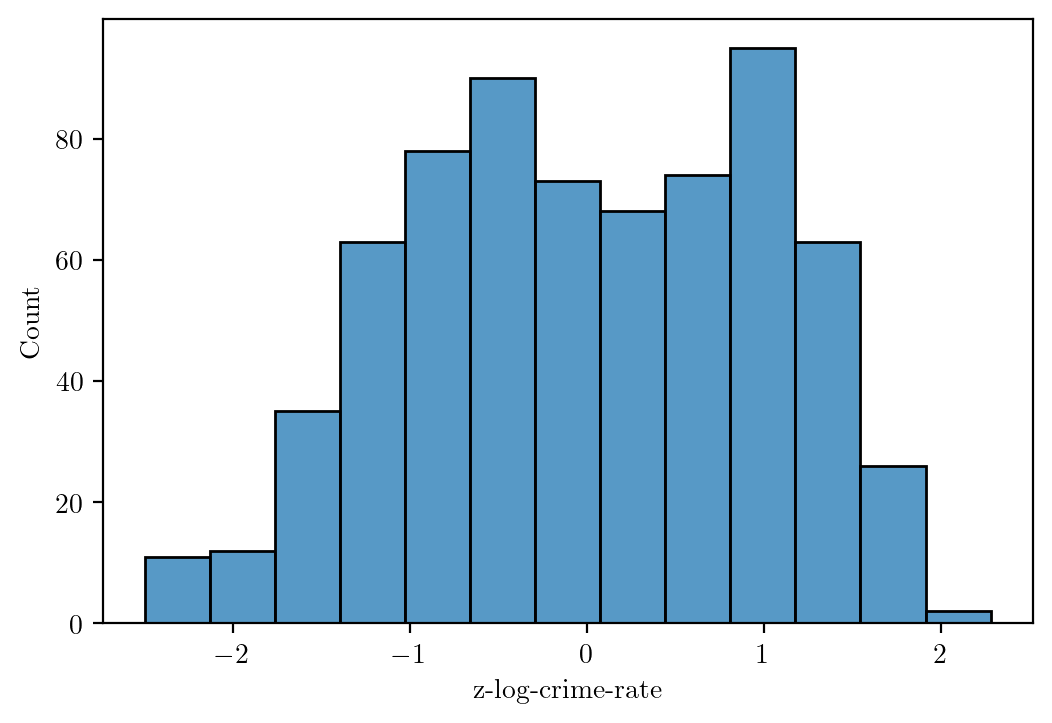

In [255]:
sns.histplot(data=crime_rate, x='z-log-crime-rate', log_scale=False)
plt.savefig('../plots/crime-rate.png')

In [256]:
df = df[['suburb', 'postcode', 'price', 'propertyType',
        'bedrooms', 'bathrooms', 'parkingSpaces', 'studies', 'furnished',
         'closest_primary_distance', 'closest_secondary_distance',
         'closest_train_distance', 'closest_tram_distance',
         'closest_bus_distance', 'closest_park_distance',
         'min_pri_icsea', 'min_sec_icsea']]

In [257]:
df.corr()

,postcode,price,bedrooms,bathrooms,parkingSpaces,studies,closest_primary_distance,closest_secondary_distance,closest_train_distance,closest_tram_distance,closest_bus_distance,closest_park_distance,min_pri_icsea,min_sec_icsea
postcode,1.000000,0.051319,0.092818,0.057613,0.119880,-0.006227,-0.009974,0.013519,0.041681,0.070881,0.013961,0.030177,0.000964,-0.050472
price,0.051319,1.000000,0.412856,0.479292,0.202823,0.133129,-0.036192,-0.054185,-0.094443,-0.195166,0.016785,-0.177642,0.277579,0.267611
bedrooms,0.092818,0.412856,1.000000,0.559250,0.545468,0.060664,0.071231,0.177465,0.371649,0.392039,0.081440,0.236430,-0.225972,-0.250312
bathrooms,0.057613,0.479292,0.559250,1.000000,0.338049,0.122663,0.102857,0.111635,0.253822,0.217483,0.082350,0.085251,-0.034211,-0.029606
parkingSpaces,0.119880,0.202823,0.545468,0.338049,1.000000,0.066055,0.031953,0.132298,0.275907,0.316921,0.032941,0.218930,-0.216453,-0.278153
studies,-0.006227,0.133129,0.060664,0.122663,0.066055,1.000000,0.019745,0.006221,0.032973,0.005817,0.010330,-0.000917,0.021652,0.039745
closest_primary_distance,-0.009974,-0.036192,0.071231,0.102857,0.031953,0.019745,1.000000,0.381517,0.393733,0.217055,0.323786,0.077098,-0.049193,0.036949
closest_secondary_distance,0.013519,-0.054185,0.177465,0.111635,0.132298,0.006221,0.381517,1.000000,0.494638,0.305288,0.247688,0.124328,-0.104458,-0.121652
closest_train_distance,0.041681,-0.094443,0.371649,0.253822,0.275907,0.032973,0.393733,0.494638,1.000000,0.544138,0.324769,0.218460,-0.287455,-0.235733
closest_tram_distance,0.070881,-0.195166,0.392039,0.217483,0.316921,0.005817,0.217055,0.305288,0.544138,1.000000,0.158681,0.258773,-0.561450,-0.532082


<AxesSubplot:xlabel='closest_primary_distance', ylabel='Count'>

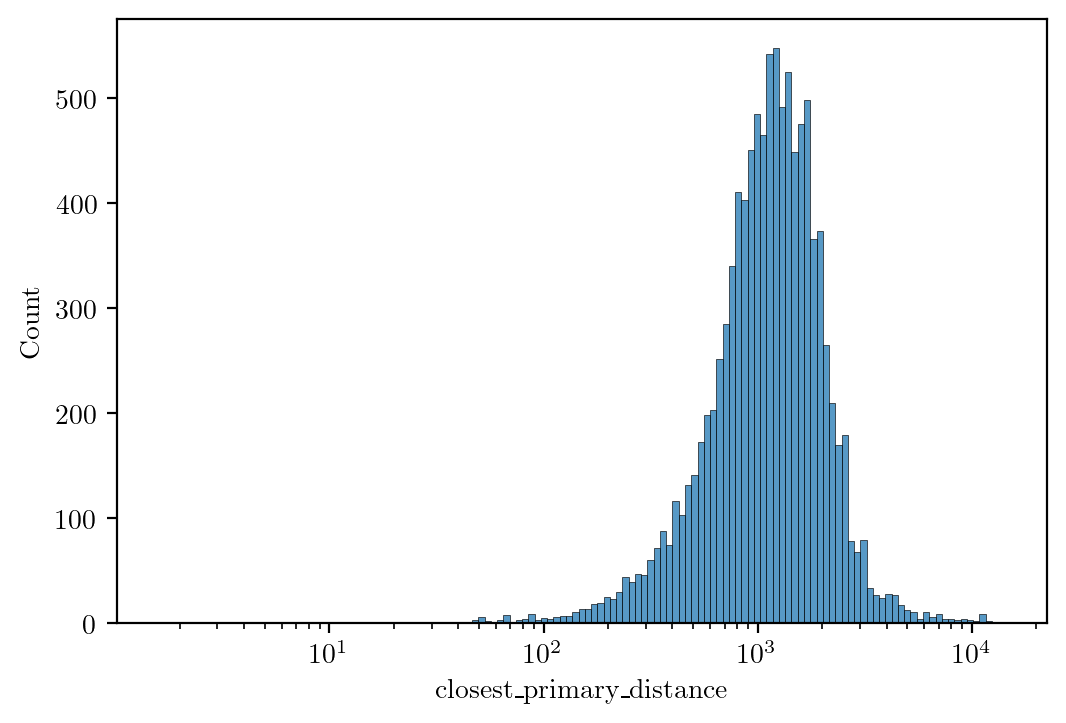

In [258]:
sns.histplot(df, x='closest_primary_distance', log_scale=True)

<AxesSubplot:xlabel='closest_park_distance', ylabel='Count'>

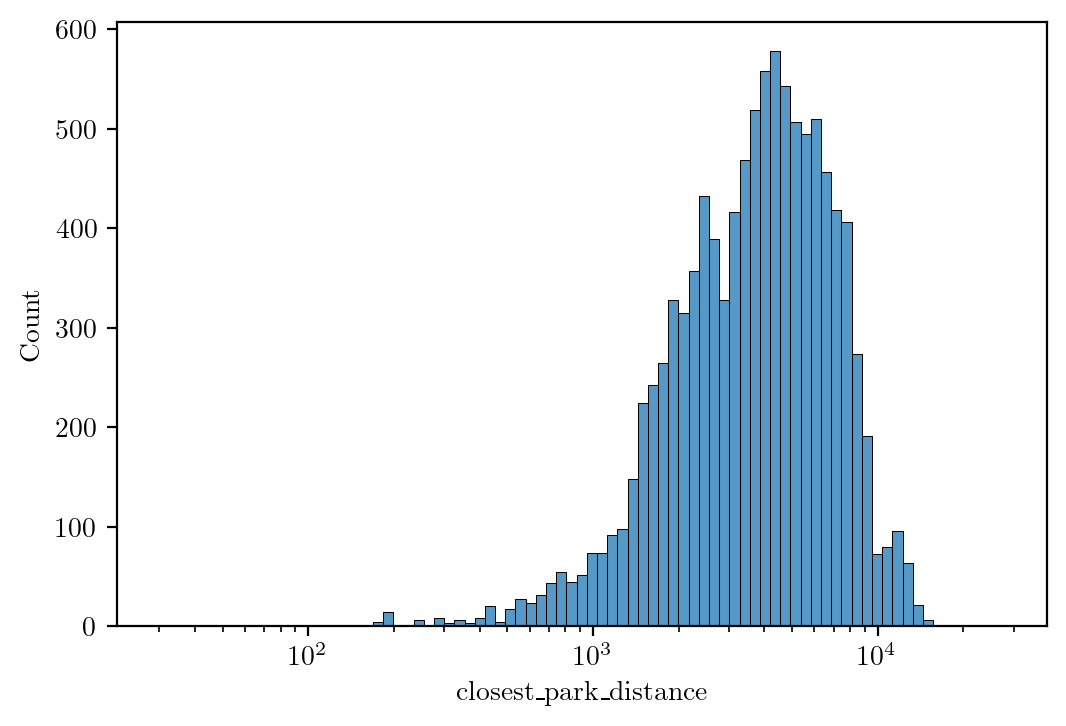

In [259]:
sns.histplot(df, x='closest_park_distance', log_scale=True)

<AxesSubplot:xlabel='closest_secondary_distance', ylabel='Count'>

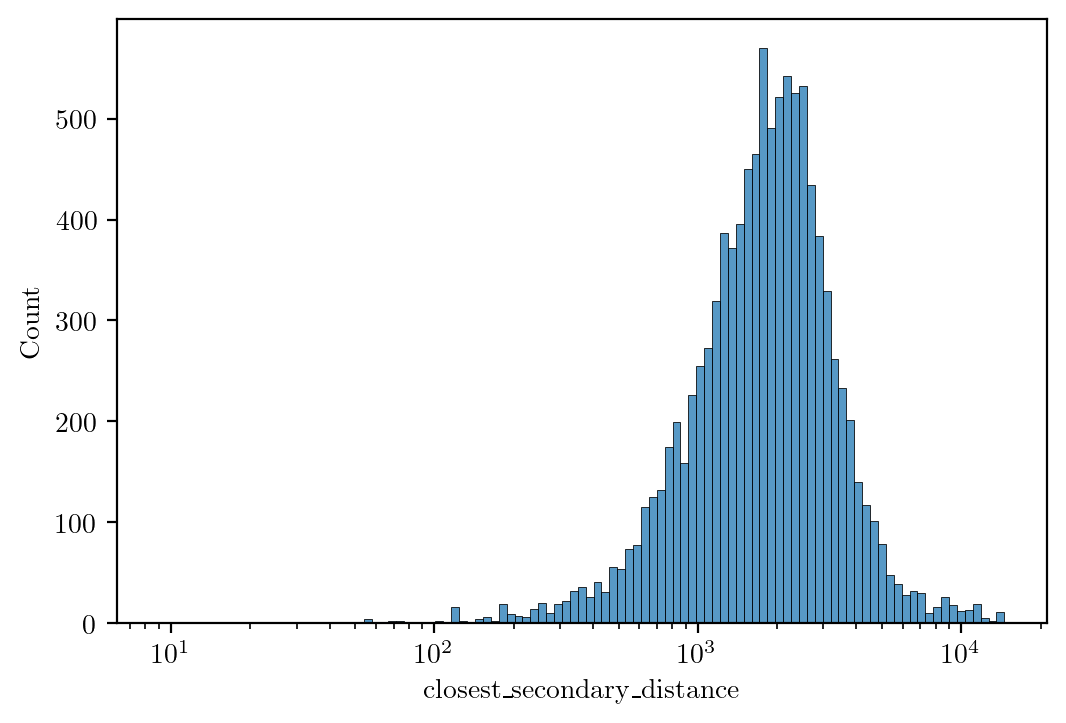

In [260]:
sns.histplot(df, x='closest_secondary_distance', log_scale=True)

<AxesSubplot:xlabel='closest_tram_distance', ylabel='Count'>

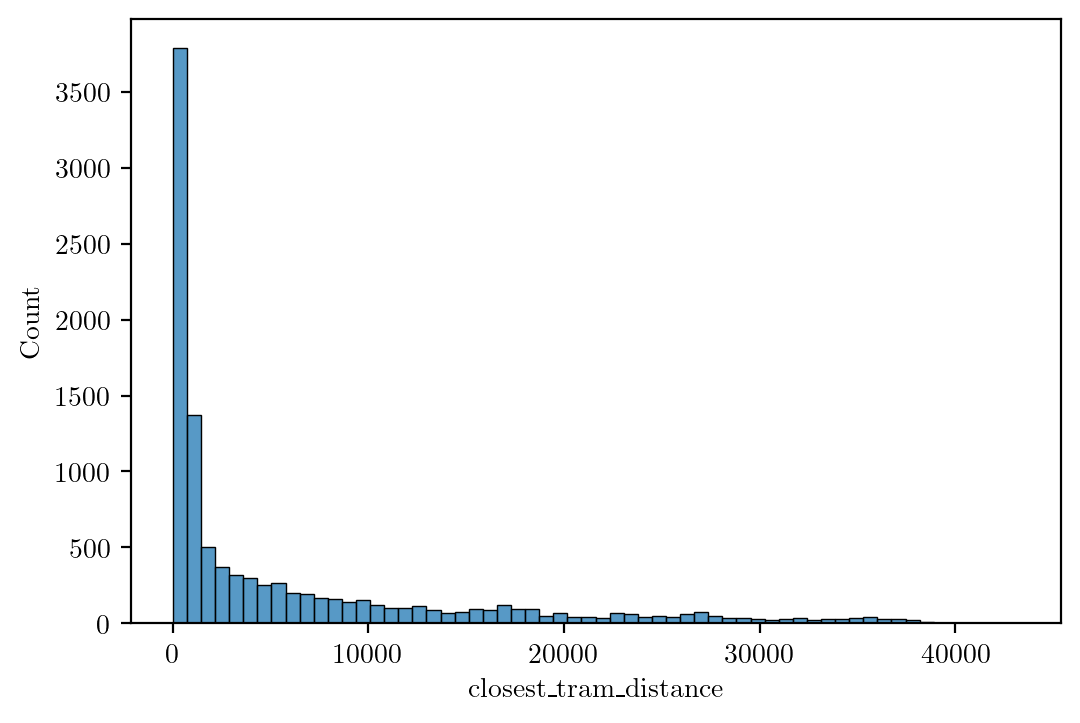

In [261]:
sns.histplot(df, x='closest_tram_distance', log_scale=False)

In [262]:
df.loc[:, 'bedrooms'] = df['bedrooms'].apply(lambda p: 1 if p in {0, 1} else p if p < 4 else '4+')
df.loc[:, 'parkingSpaces'] = df['parkingSpaces'].apply(lambda p: p if p < 3 else '3+')
df.loc[:, 'bathrooms'] = df['bathrooms'].apply(lambda p: p if p < 3 else '3+')


In [263]:
rcParams['figure.dpi'] = 200

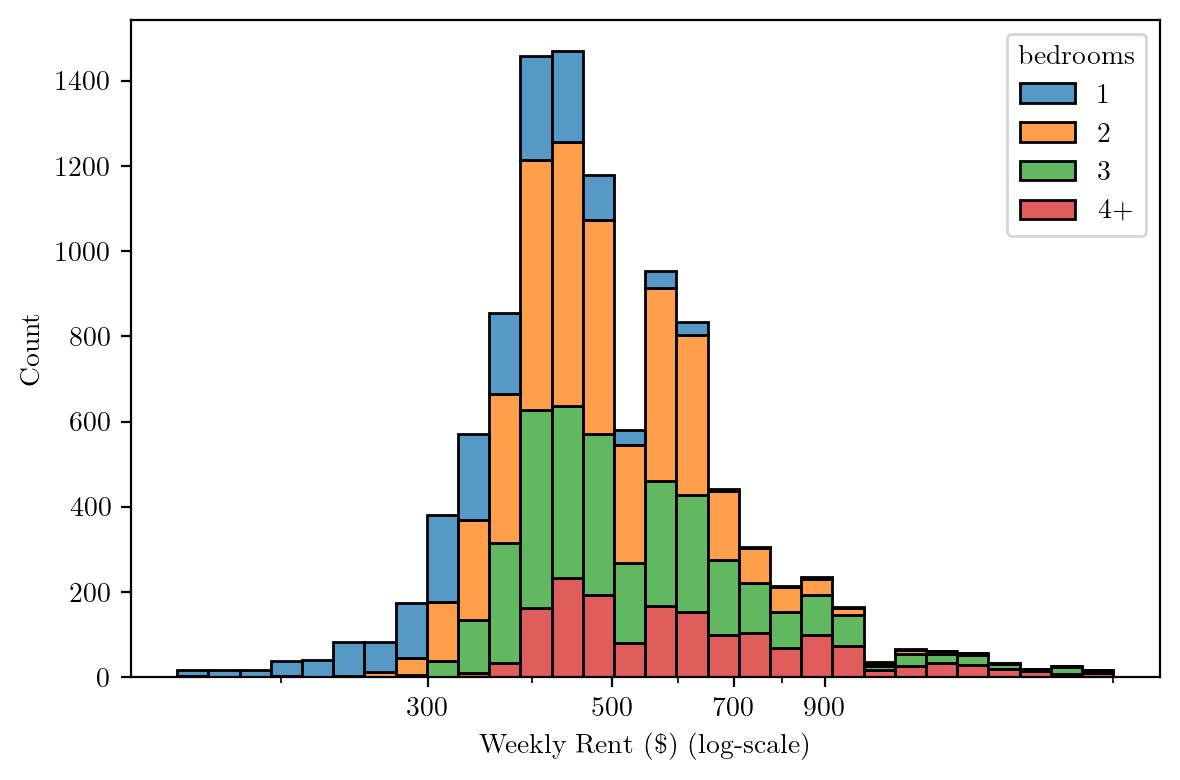

In [264]:
sns.histplot(df, x='price', hue='bedrooms', log_scale=True, multiple='stack', hue_order=[1, 2, 3, '4+'], bins=30)
plt.xlabel(r'Weekly Rent (\$) (log-scale)')
plt.xticks([300, 500, 700, 900], labels=['300', '500', '700', '900'])
plt.tight_layout()
plt.savefig('../plots/rent-distn-by-bedrooms.png')

* More bedrooms -> more rent

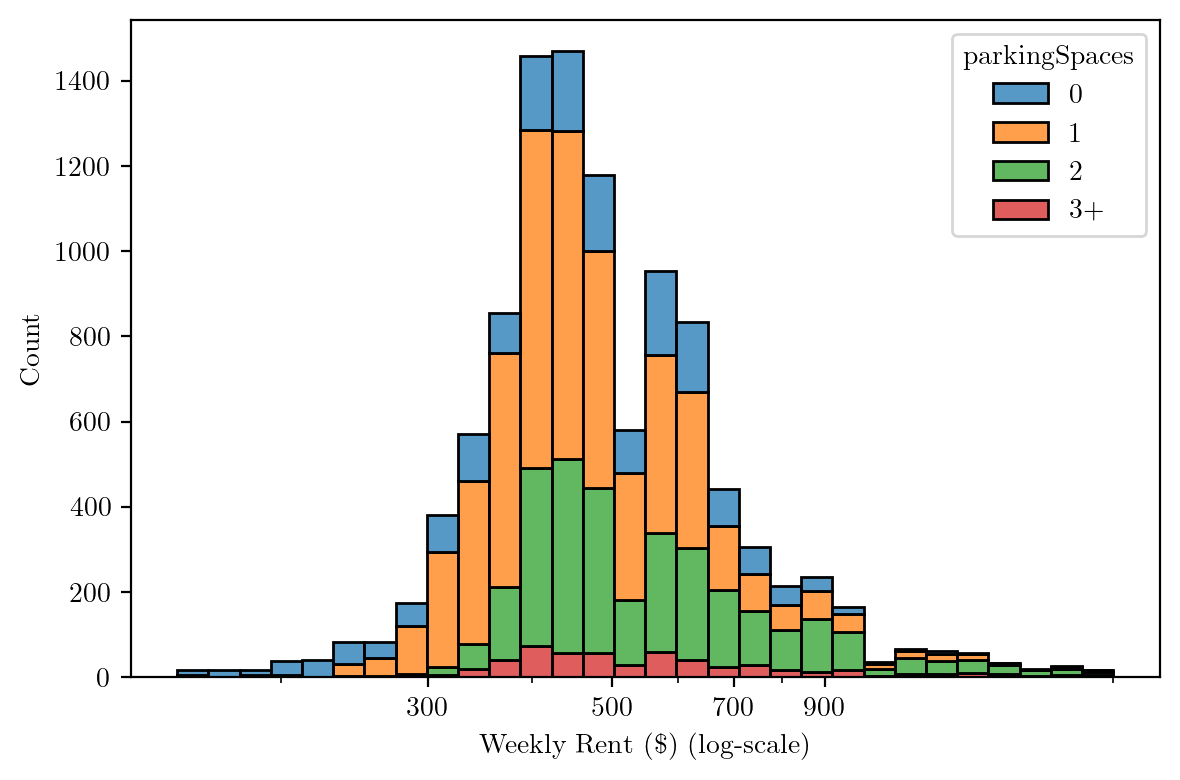

In [265]:
sns.histplot(df, x='price', hue='parkingSpaces', log_scale=True, multiple='stack', bins=30)
plt.xlabel(r'Weekly Rent (\$) (log-scale)')
plt.xticks([300, 500, 700, 900], labels=['300', '500', '700', '900'])
plt.tight_layout()
plt.savefig('../plots/rent-distn-by-parking.png')

* Properties less than $300 almost never have more than 1 parking space
* It is rare for a property to have more than 2 parking spaces, when it does, it doesn't seem to impact the rent

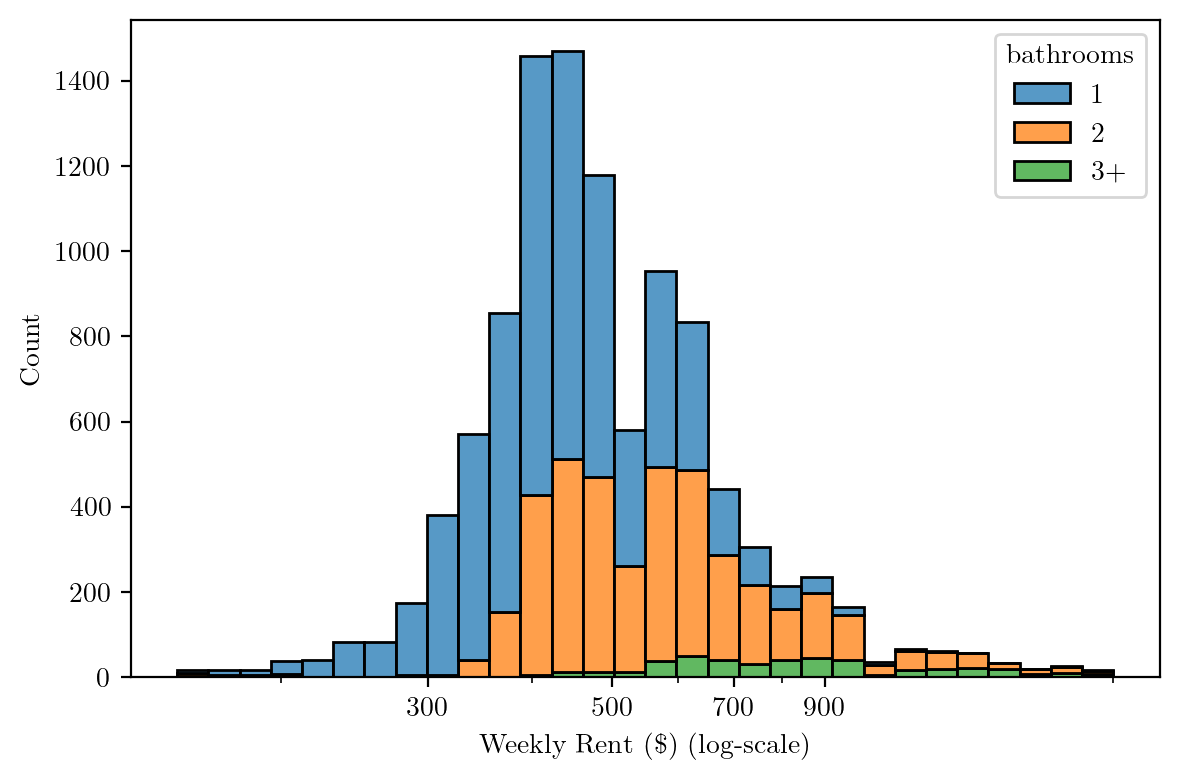

In [266]:
sns.histplot(df, x='price', hue='bathrooms', log_scale=True, multiple='stack', bins=30)
plt.xlabel(r'Weekly Rent (\$) (log-scale)')
plt.xticks([300, 500, 700, 900], labels=['300', '500', '700', '900'])
plt.tight_layout()
plt.savefig('../plots/rent-distn-by-bathrooms.png')

* Affordable properties almost never have more than 1 bathroom.
* Few properties have more than 2 bathrooms, those which do attract a premium.

In [267]:
df.loc[:, 'propertyType'] = df['propertyType'].apply(lambda t: t if t in ['House', 'Unit', 'Townhouse', 'Apartment'] else 'Other')

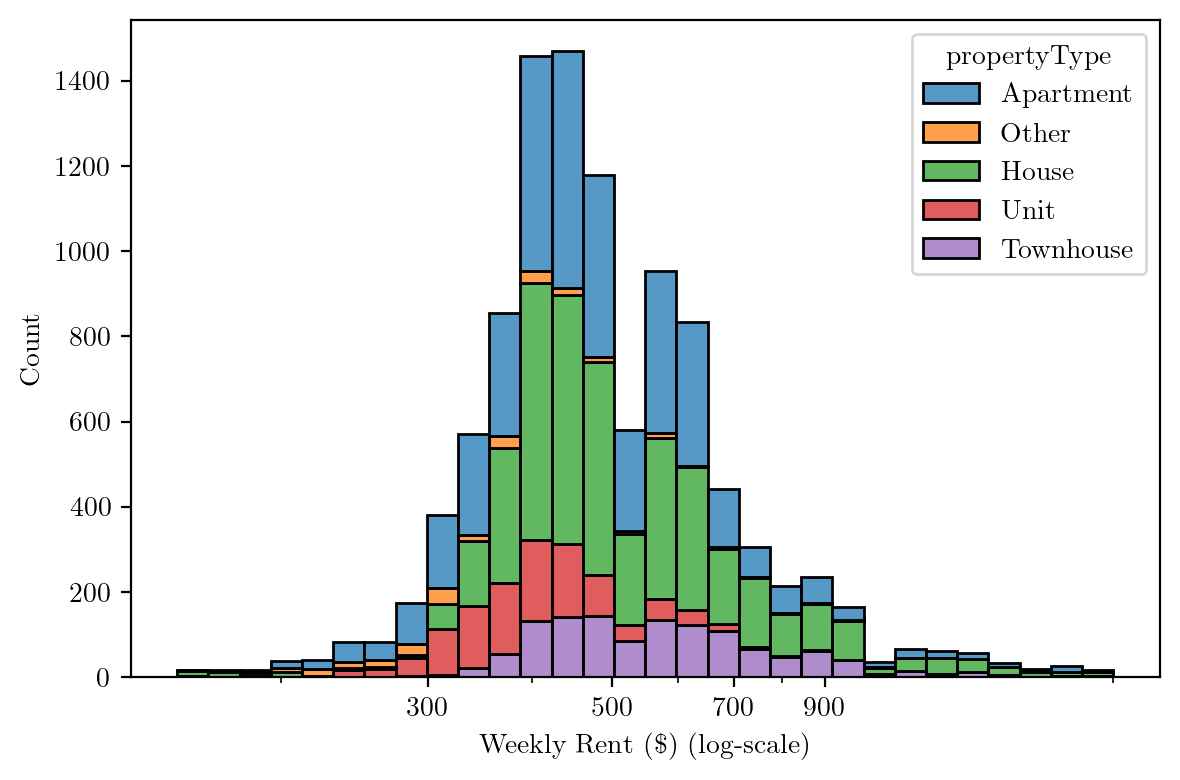

In [268]:
sns.histplot(data=df, x='price', hue='propertyType', multiple='stack',
             bins=30, log_scale=True)
plt.xlabel(r'Weekly Rent (\$) (log-scale)')
plt.xticks([300, 500, 700, 900], labels=['300', '500', '700', '900'])
plt.tight_layout()
plt.savefig('../plots/rent-distn-by-type.png')


* Townhouses attract a premium
* Units are more affordable

<AxesSubplot:xlabel='price', ylabel='Count'>

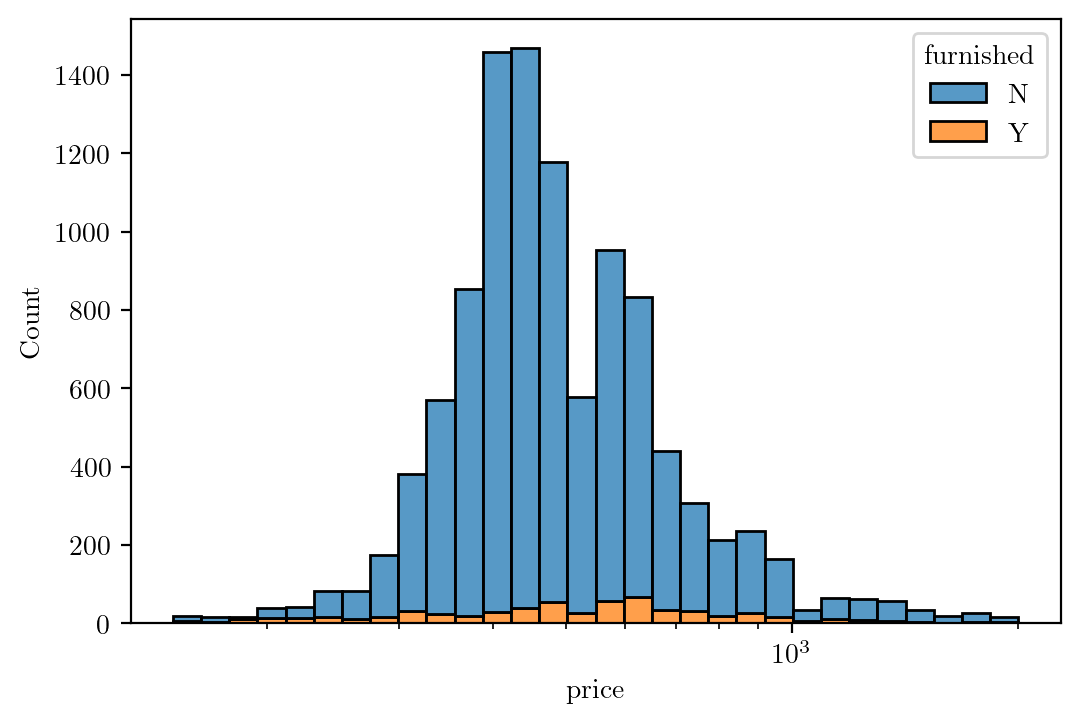

In [269]:
sns.histplot(data=df, x='price', hue='furnished', multiple='stack',
             bins=30, log_scale=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

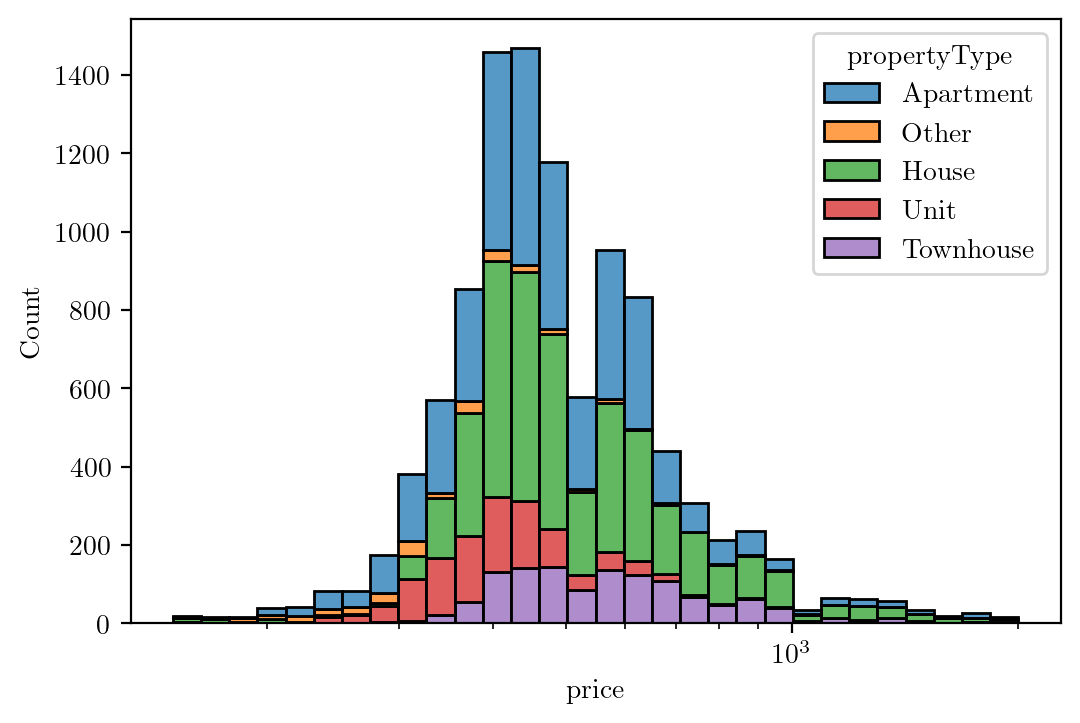

In [270]:
sns.histplot(data=df, x='price', hue='propertyType', multiple='stack',
             bins=30, log_scale=True)

In [271]:
model = glm(formula="""price ~ closest_train_distance + closest_tram_distance
                             + closest_bus_distance + closest_park_distance""",
            families=families.Gaussian(link=families.links.log()),
            data=df)

model.fit().summary()

# Model interpretation:
#
# Effect of suburb properties on rental income
#
# Train station distance has no effect
# Properties close to tram stops are valued more
# Properties further from bus stops are valued more
# Properties close to parks are valued more
# Primary school ICSEA increases value alot

/home/lachstr/.local/lib/python3.10/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['families']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  price   No. Observations:                10422
Model:                            GLM   Df Residuals:                    10417
Model Family:                Gaussian   Df Model:                            4
Link Function:               identity   Scale:                          42132.
Method:                          IRLS   Log-Likelihood:                -70275.
Date:                Wed, 05 Oct 2022   Deviance:                   4.3889e+08
Time:                        21:45:36   Pearson chi2:                 4.39e+08
No. Iterations:                     3   Pseudo R-squ. (CS):            0.05993
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                584.8841      4.289    136.357      0.000     576.477     593.291
closest_train_distance     0.0014      0.001      1.311      0.190      -0.001       0.003
closest_tram_distance     -0.0042      0.000    -15.248      0.000      -0.005      -0.004
closest_bus_distance       0.0143      0.003      4.824      0.000       0.008       0.020
closest_park_distance     -0.0117      0.001    -14.033      0.000      -0.013      -0.010
==========================================================================================
"""

In [272]:

model = ols(formula="""price ~ closest_primary_distance + closest_secondary_distance""",
            data=df)

model.fit().summary()

# Model interpretation:
#
# Effect of suburb properties on rental income, a
#
# Primary school distance has no effect
# Properties closer to public secondary schools are valued more

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     16.82
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           5.10e-08
Time:                        21:45:36   Log-Likelihood:                -70571.
No. Observations:               10422   AIC:                         1.411e+05
Df Residuals:                   10419   BIC:                         1.412e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    539.6624      4.150    130.053      0.000     531.529     547.796
closest_primary_distance      -0.0042      0.002     -1.716      0.086      -0.009       0.001
closest_secondary_distance    -0.0069      0.002     -4.466      0.000      -0.010      -0.004
==============================================================================
Omnibus:                     5526.119   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47258.247
Skew:                           2.418   Prob(JB):                         0.00
Kurtosis:                      12.244   Cond. No.                     5.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""